### Experiment: Induced voltage on the submarine cables, electrically (a) long and (b) short cables.
---
* __author__ = Chakraborty, S.
* __license__ = GPL3
* __email__ = shibaji7@vt.edu
* __status__ = Research

In [1]:
# Import all required libs
import matplotlib as mpl
import matplotlib.pyplot as plt
# Set matplotlib styles
plt.style.use(["science", "ieee"])
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Tahoma", "DejaVu Sans",
                                   "Lucida Grande", "Verdana"]
import pandas as pd

# Import IPython dependencies
from IPython.display import Image, display

# Import SCUBAS dependencies
from scubas.datasets import PROFILES
from scubas.models import OceanModel
from scubas.plotlib import plot_transfer_function, potential_along_section, cable_potential, update_rc_params
from scubas.cables import TransmissionLine, Cable
from scubas.conductivity import ConductivityProfile as CP


Bad key "text.kerning_factor" on line 4 in
/home/shibaji/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


2023-06-10 15:10:55.283 | INFO     | scubas.models:__init__:44 - Compile Ocean-model: Deep Ocean E- and B-Fields


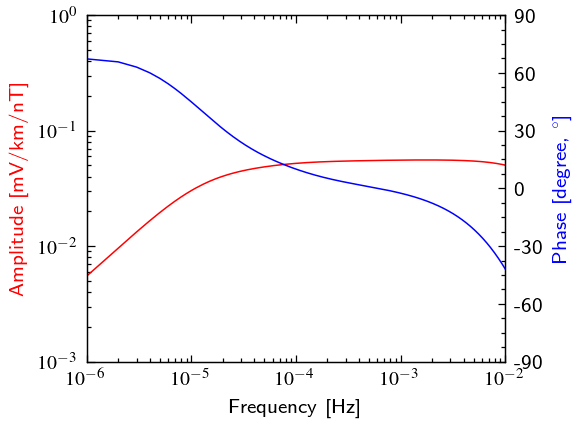

In [2]:
# Ocean-Earth conductivity profile of a Deep Ocean
site = PROFILES.DO_3
# Rended ocean model
om = OceanModel(site)
# Generate transfer function
tf = om.get_TFs()
# Transfer function of a Deep Ocean.
# We are going to use this tranfer function to compute differen electrical cases
_ = plot_transfer_function(tf)

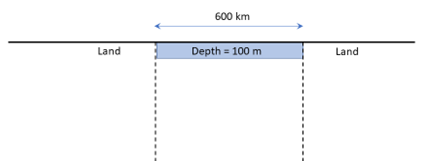

In [3]:
####################################################################
# Display geometrical structure that illustrates the cable and 
# ocean/water body-earth profile. To start with we are going to use
# 600 km long wire submarged under 100 m of water and each end 
# connected to land.
####################################################################
display(Image(filename="figures/Short-Cable-CS.png"))

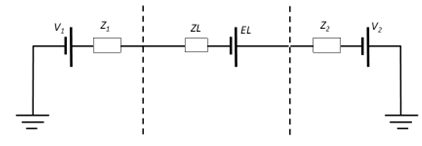

In [4]:
####################################################################
# Equivalent electrical circuit 
####################################################################
display(Image(filename="figures/Circuit-Cable-CS.png"))

2023-06-10 15:10:58.989 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-06-10 15:10:58.991 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width: 1.0
2023-06-10 15:10:58.992 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width: 1.0
2023-06-10 15:10:58.993 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width: 1.0
2023-06-10 15:10:59.004 | INFO     | scubas.cables:run_nodal_analysis:347 - Eq. nodal analysis.
2023-06-10 15:10:59.005 | INFO     | scubas.cables:run_nodal_analysis:351 - Node:0
2023-06-10 15:10:59.006 | INFO     | scubas.cables:run_nodal_analysis:351 - Node:1
2023-06-10 15:10:59.007 | INFO     | scubas.cables:solve_admitance_matrix:402 - Solving admitance matrix.
2023-06-10 15:10:59.008 | INFO     | scubas.cables:solve_admitance_matrix:404 - Solving for component X.
2023-06-10 15:10:59.009 | INFO     | scubas.cables:solve_admitance_matrix:411 - Sh(J):(2, 1), Sh(Y):

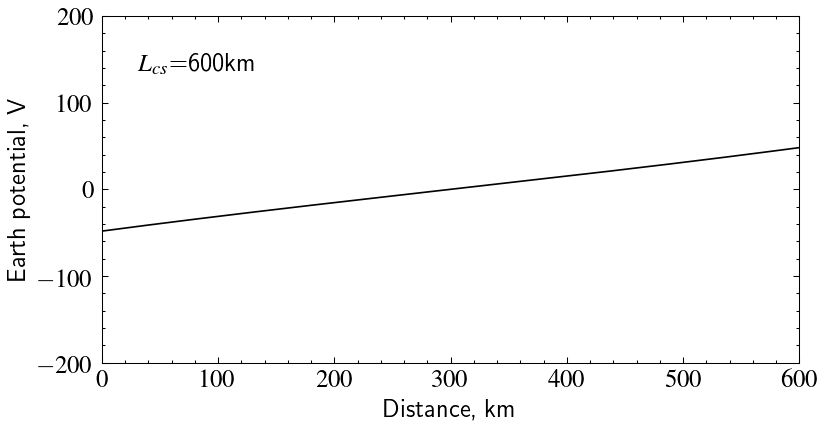

In [5]:
####################################################################
# Simulating the case: Induced electric field 0.3 V/km on a 
# shallow continental shelf with depth 100 m, length 600 km
####################################################################
e_CS = pd.DataFrame()
e_CS["X"], e_CS["dTime"] = [300], [0]
length=600
tl = TransmissionLine(
    sec_id="CS",
    directed_length=dict(
        length_north=length,
    ),
    elec_params=dict(
        site=PROFILES.CS,
        width=1.0,
        flim=[1e-6, 1e0],
    ),
    active_termination=dict(
        right=PROFILES.LD,
        left=PROFILES.LD,
    ),
)
tl.compute_eqv_pi_circuit(e_CS, ["X"])
cable = Cable([tl], ["X"])
Vc, Lc = cable._pot_along_cable_(0)
tag = cable_potential(Vc, Lc, ylim=[-200, 200])
_ = tag["axes"].text(0.05, 0.85, r"$L_{cs}$=%dkm"%length, ha="left", va="center", transform=tag["axes"].transAxes)

2023-06-10 15:11:43.195 | INFO     | scubas.cables:compute_lengths:69 - Cable length from directed length
2023-06-10 15:11:43.196 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width: 1.0
2023-06-10 15:11:43.198 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width: 1.0
2023-06-10 15:11:43.198 | INFO     | scubas.cables:calc_trasmission_line_parameters:214 - Cable width: 1.0
2023-06-10 15:11:43.202 | INFO     | scubas.cables:run_nodal_analysis:347 - Eq. nodal analysis.
2023-06-10 15:11:43.203 | INFO     | scubas.cables:run_nodal_analysis:351 - Node:0
2023-06-10 15:11:43.203 | INFO     | scubas.cables:run_nodal_analysis:351 - Node:1
2023-06-10 15:11:43.204 | INFO     | scubas.cables:solve_admitance_matrix:402 - Solving admitance matrix.
2023-06-10 15:11:43.204 | INFO     | scubas.cables:solve_admitance_matrix:404 - Solving for component X.
2023-06-10 15:11:43.205 | INFO     | scubas.cables:solve_admitance_matrix:411 - Sh(J):(2, 1), Sh(Y):

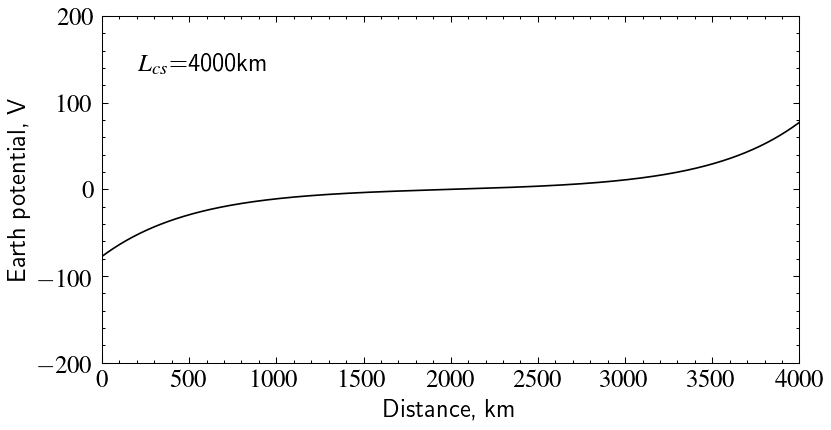

In [6]:
####################################################################
# Simulating the case: Induced electric field 0.3 V/km on a 
# shallow continental shelf with depth 100 m, length 4000 km
####################################################################
length=4000
tl = TransmissionLine(
    sec_id="CS",
    directed_length=dict(
        length_north=length,
    ),
    elec_params=dict(
        site=PROFILES.CS,
        width=1.0,
        flim=[1e-6, 1e0],
    ),
    active_termination=dict(
        right=PROFILES.LD,
        left=PROFILES.LD,
    ),
)
tl.compute_eqv_pi_circuit(e_CS, ["X"])
cable = Cable([tl], ["X"])
Vc, Lc = cable._pot_along_cable_(0)
tag = cable_potential(Vc, Lc, ylim=[-200, 200])
_ = tag["axes"].text(0.05, 0.85, r"$L_{cs}$=%dkm"%length, ha="left", va="center", transform=tag["axes"].transAxes)